# Naive Calculation Function

In [1]:
# imports
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
# writing in files
from datetime import date
time = date.today()
case = '1996122500'
temp = 'max'
region = 'CA/NV'
stats = []


header = ['Date','Case','Run','Region','Tmax/Tmin','Previous Bias','Previous RMSE',
         'Next Bias','Next RMSE','Best-Bias Bias','Best-Bias RMSE','Best-RMSE Bias','Best-RMSE RMSE']
filename = "statisticsAR1996.csv"

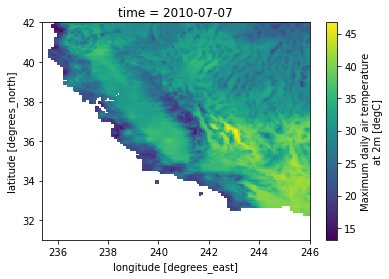

In [3]:
def ca_nv(dataarray):
        lat_drop = dataarray.where(dataarray.lat < 42, drop = True)
        lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
        lon_drop = lat_drop.where(lat_drop.lon < 246, drop = True)
        return lon_drop
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/tmax.2010.nc'
fn2 = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/ptt_2017.nc'
liv_file = xr.open_dataset(fn)
liv_file2 = xr.open_dataset(fn2)
liv = ca_nv(liv_file['tmax'][187])
liv2 = ca_nv(liv_file2['Tmax'][187])
liv.plot()

In [4]:
def calc(run):
    
    # CA/NV for wrf
    def ca_nv(dataarray):
        lat_drop = dataarray.where(dataarray.lat < 42, drop = True)
        lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
        lon_drop = lat_drop.where(lat_drop.lon < -114, drop = True)
        return lon_drop
    # CA/NV for liv
    def ca_nv_liv(dataarray):
        lat_drop = dataarray.where(dataarray.lat < 42, drop = True)
        lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
        lon_drop = lat_drop.where(lat_drop.lon < 246, drop = True)
        return lon_drop
    
    next_06 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-26_next.nc'))
    next_07 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-27_next.nc'))
    next_08 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-28_next.nc'))
    next_09 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-29_next.nc'))
    next_10 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-30_next.nc'))
    next_11 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-31_next.nc'))
    next_12 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-01_next.nc'))
    next_13 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-02_next.nc'))
    next_14 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-03_next.nc'))
    next_15 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-04_next.nc'))

    prev_06 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-26_prev.nc'))
    prev_07 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-27_prev.nc'))
    prev_08 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-28_prev.nc'))
    prev_09 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-29_prev.nc'))
    prev_10 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-30_prev.nc'))
    prev_11 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1996-12-31_prev.nc'))
    prev_12 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-01_prev.nc'))
    prev_13 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-02_prev.nc'))
    prev_14 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-03_prev.nc'))
    prev_15 = ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_maxd02_1997-01-04_prev.nc'))
    
    d6 = next_06.data.flatten()
    d7 = next_07.data.flatten()
    d8 = next_08.data.flatten()
    d9 = next_09.data.flatten()
    d10 = next_10.data.flatten()
    d11 = next_11.data.flatten()
    d12 = next_12.data.flatten()
    d13 = next_13.data.flatten()
    d14 = next_14.data.flatten()
    d15 = next_15.data.flatten()
    p6 = prev_06.data.flatten()
    p7 = prev_07.data.flatten()
    p8 = prev_08.data.flatten()
    p9 = prev_09.data.flatten()
    p10 = prev_10.data.flatten()
    p11 = prev_11.data.flatten()
    p12 = prev_12.data.flatten()
    p13 = prev_13.data.flatten()
    p14 = prev_14.data.flatten()
    p15 = prev_15.data.flatten()

    bn_data = {
              'n6': d6, 'n7': d7, 'n8': d7, 'n9': d9, 'n10': d10, 'n11': d11, 'n12': d12, 'n13': d13, 'n14': d14, 'n15': d15,
              'p6': p6, 'p7': p7, 'p8': p7, 'p9': p9, 'p10': p10, 'p11': p11, 'p12': p12, 'p13': p13, 'p14': p14, 'p15': p15}

    bn = pd.DataFrame(bn_data)
    solid = pd.DataFrame(bn_data)
    
    out_prev = pd.DataFrame()
    out_next = pd.DataFrame()
    
    def diff(num_str, day, table, out):
        fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/tmax.1996.nc'
        fn2 = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/tmax.1997.nc'
        liv_file = ca_nv_liv(xr.open_dataset(fn))
        liv_file2 = ca_nv_liv(xr.open_dataset(fn2))
        if day > 300:
            liv = liv_file['tmax'][day].data.flatten()
        else:
            liv = liv_file2['tmax'][day].data.flatten()
        table[num_str][table[num_str] == 0.0] = np.NAN
        table[num_str] = table[num_str] - 273.15
        subtr = np.subtract(np.array(table[num_str]), liv)
        out[num_str] = subtr
        
    prev_d = ['p6','p7','p8','p9','p10','p11','p12','p13','p14','p15']
    next_d = ['n6','n7','n8','n9','n10','n11','n12','n13','n14','n15']
    liv_days = [360,361,362,363,364,365,1,2,3,4]
    
    for i in np.arange(len(liv_days)):
        diff(prev_d[i],liv_days[i],bn,out_prev)
        diff(next_d[i],liv_days[i],bn,out_next)
        
    bias_prev = out_prev.values.flatten()[~np.isnan(out_prev.values.flatten())].mean()
    bias_next = out_next.values.flatten()[~np.isnan(out_next.values.flatten())].mean()
    sq_all_prev = out_prev**2
    rmse_prev = np.sqrt(sq_all_prev.values.flatten()[~np.isnan(sq_all_prev.values.flatten())].mean())
    sq_all_next = out_next**2
    rmse_next = np.sqrt(sq_all_next.values.flatten()[~np.isnan(sq_all_next.values.flatten())].mean())
    
    # best-bias
    pre_bias = pd.concat([out_prev, out_next], axis=1)
    init_bias_next = pre_bias['n6'] + pre_bias['n7'] + pre_bias['n8'] + pre_bias['n9'] + pre_bias['n10'] + pre_bias['n11'] + pre_bias['n12'] + pre_bias['n13'] + pre_bias['n14'] + pre_bias['n15']
    init_bias_next = init_bias_next / 10
    init_bias_prev = pre_bias['p6'] + pre_bias['p7'] + pre_bias['p8'] + pre_bias['p9'] + pre_bias['p10'] + pre_bias['p11'] + pre_bias['p12'] + pre_bias['p13'] + pre_bias['p14'] + pre_bias['p15']
    init_bias_prev = init_bias_prev / 10
    solid['Bias Next'] = init_bias_next
    solid['Bias Previous'] = init_bias_prev
    
    # best-rmse
    days_next = ['n6','n7','n8','n9','n10','n11','n12','n13','n14','n15']
    days_prev = ['p6','p7','p8','p9','p10','p11','p12','p13','p14','p15']
    init_next = []
    init_prev = []
    for a in np.arange(29920):
        rmse_next1 = np.sqrt(np.mean((pre_bias.loc[a,days_next].values)**2))
        init_next.append(rmse_next1)
        rmse_prev1 = np.sqrt(np.mean((pre_bias.loc[a,days_prev].values)**2))
        init_prev.append(rmse_prev1)
    
    solid['Rmse Next'] = init_next
    solid['Rmse Previous'] = init_prev
    
    out_bias = pd.DataFrame()
    out_rmse = pd.DataFrame()

    def smallest_magnitude(next_dif, prev_dif, w_next, w_prev):
        if abs(prev_dif) < abs(next_dif):
            return w_prev
        else:
            return w_next

    def output_bias(num_str):
        result = []
        for x in np.arange(29920):
            temp = smallest_magnitude(solid['Bias Next'][x], solid['Bias Previous'][x], solid['n'+num_str][x], solid['p'+num_str][x])
            result.append(temp)
        out_bias[num_str] = result
        
    def output_rmse(num_str):
        result = []
        for x in np.arange(29920):
            temp = smallest_magnitude(solid['Rmse Next'][x], solid['Rmse Previous'][x], solid['n'+num_str][x], solid['p'+num_str][x])
            result.append(temp)
        out_rmse[num_str] = result

    days = ['6','7','8','9','10','11','12','13','14','15']
    for i in np.arange(10):
        output_bias(days[i])
        output_rmse(days[i])
    for i in np.arange(10):
        diff(days[i], liv_days[i], out_bias, out_bias)
        diff(days[i], liv_days[i], out_rmse, out_rmse)
        
    bb_bias = out_bias.values.flatten()[~np.isnan(out_bias.values.flatten())].mean()
    bb_sq = (out_bias)**2
    bb_rmse = np.sqrt(bb_sq.values.flatten()[~np.isnan(bb_sq.values.flatten())].mean())
    
    rm_bias = out_rmse.values.flatten()[~np.isnan(out_rmse.values.flatten())].mean()
    rm_sq = (out_rmse)**2
    rm_rmse = np.sqrt(rm_sq.values.flatten()[~np.isnan(rm_sq.values.flatten())].mean())
    
    # next/prev
    print(run + ' Prev Bias, Prev Rmse')
    previous_bias = round(bias_prev,2)
    previous_rmse = round(rmse_prev,2)
    print(round(bias_prev,2), round(rmse_prev,2))
    print(run + ' Next Bias, Next Rmse')
    next_bias = round(bias_next,2)
    next_rmse = round(rmse_next,2)
    print(round(bias_next,2), round(rmse_next,2))
    
    # best bias
    print(run + ' Best-Bias Bias:')
    best_bias_bias = round(bb_bias,2)
    print(round(bb_bias,2))
    print(run + ' Best-Bias RMSE:')
    best_bias_rmse = round(bb_rmse,2)
    print(round(bb_rmse,2))
    
    # best rmse
    print(run + ' Best-Rmse Bias:')
    best_rmse_bias = round(rm_bias,2)
    print(round(rm_bias,2))
    print(run + ' Best-Rmse RMSE:')
    best_rmse_rmse = round(rm_rmse,2)
    print(round(rm_rmse,2))
    
    if abs(previous_bias) < abs(best_bias_bias):
        previous_bias, best_bias_bias = best_bias_bias, previous_bias
        previous_rmse, best_bias_rmse = best_bias_rmse, previous_rmse
    elif abs(next_bias) < abs(best_bias_bias):
        next_bias, best_bias_bias = best_bias_bias, next_bias
        next_rmse, best_bias_rmse = best_bias_rmse, next_rmse
    elif abs(best_rmse_bias) < abs(best_bias_bias):
        best_rmse_bias, best_bias_bias = best_bias_bias, best_rmse_bias
        
    new_line = [time,case,run,region,temp,
                previous_bias, previous_rmse,
                next_bias, next_rmse,
                best_bias_bias,best_bias_rmse,
                best_rmse_bias,best_rmse_rmse]
    stats.append(new_line)

In [5]:
#lst = ['NG-GR-NQ-BD','NG-GR-YQ-BD','NG-SP-NQ-PO','OO-6D','OO-CO','OO-SC','PH-MO-GF-MY','PH-MO-TK-MY',
       #'PH-TH-GF-MY','PH-TH-TK-MY','VL-100','VL-120','NG-GR-NQ-PO','NG-GR-YQ-PO','NG-SP-YQ-PO','OO-CC',
       #'OO-NP','OO-VC','PH-MO-GF-YU','PH-MO-TK-YU','PH-TH-GF-YU','PH-TH-TK-YU','VL-110','VL-130']
lst = ['CC-TH-GF-M3','CC-TH-GF-MY','NC-TH-GF-MY'] #'CC-TA-GF-MY', 
for i in lst:
    calc(i)

CC-TH-GF-M3 Prev Bias, Prev Rmse
0.18 3.1
CC-TH-GF-M3 Next Bias, Next Rmse
-0.48 2.21
CC-TH-GF-M3 Best-Bias Bias:
-0.08
CC-TH-GF-M3 Best-Bias RMSE:
2.65
CC-TH-GF-M3 Best-Rmse Bias:
-0.38
CC-TH-GF-M3 Best-Rmse RMSE:
2.15
CC-TH-GF-MY Prev Bias, Prev Rmse
0.93 3.12
CC-TH-GF-MY Next Bias, Next Rmse
0.27 2.26
CC-TH-GF-MY Best-Bias Bias:
0.51
CC-TH-GF-MY Best-Bias RMSE:
2.52
CC-TH-GF-MY Best-Rmse Bias:
0.34
CC-TH-GF-MY Best-Rmse RMSE:
2.22
NC-TH-GF-MY Prev Bias, Prev Rmse
0.91 3.12
NC-TH-GF-MY Next Bias, Next Rmse
0.26 2.26
NC-TH-GF-MY Best-Bias Bias:
0.49
NC-TH-GF-MY Best-Bias RMSE:
2.53
NC-TH-GF-MY Best-Rmse Bias:
0.33
NC-TH-GF-MY Best-Rmse RMSE:
2.21


# writing to csv file 
import csv 
with open(r'statisticsAR1996.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    
    # writing the data rows 
    csvwriter.writerows(stats)

In [6]:
# writing to csv file 
import csv 
with open(r'newstats.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    
    # writing the data rows 
    csvwriter.writerows(stats)